In [2]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from ase.db import connect

import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from funcs.distance import *
from funcs.convert import *
from funcs.display import *

In [5]:
row = train_db.get(2)
display_molecule_video(row, equal_aspect_ratio=True, bond_type=False)

In [6]:
row = train_db.get(3)
display_molecule_video(row, equal_aspect_ratio=True, bond_type=False)

## Smth else

In [3]:
row = train_db.get(500)

In [4]:
dist_mat = get_distance_matrix(row)

In [5]:
get_bond_counts(dist_mat, row.symbols)

{'CC2': 8,
 'CH1': 18,
 'CN1': 3,
 'NO2': 1,
 'CO1': 2,
 'CC1.5': 6,
 'CO2': 2,
 'CN2': 2,
 'HN1': 1}

In [6]:
bond_matrix = get_bond_type_matrix(dist_mat, row.symbols)

bond_matrix

array([[0., 2., 0., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
bond_matrix.sum(axis=1)

array([5., 7., 5., 4., 3., 3., 4., 5., 4., 4., 5., 4., 6., 5., 1., 5., 7.,
       6., 6., 4., 4., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

<Figure size 864x576 with 0 Axes>

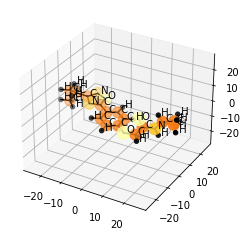

<Figure size 864x576 with 0 Axes>

In [8]:
display_molecule(row, equal_aspect_ratio=True, bond_type=False)

In [9]:
atom_total_bonds = {
    'H': 1,
    'C':4,
    'N':3,
    'O':8,
    'F':1,
    'S':2,
    'Cl':1,
    'Br':1
}

In [10]:
bond_count = bond_matrix.sum(axis=1)
correct_bond_count = np.array([atom_total_bonds[atom] for atom in row.symbols])

less_enough_rows = np.less(bond_count, correct_bond_count).astype('int64')[None, ...]
more_enough_rows = np.greater(bond_count, correct_bond_count).astype('int64')[None, ...]

possible_less_cells = less_enough_rows * less_enough_rows.T * -1 + 1
possible_more_cells = more_enough_rows * more_enough_rows.T

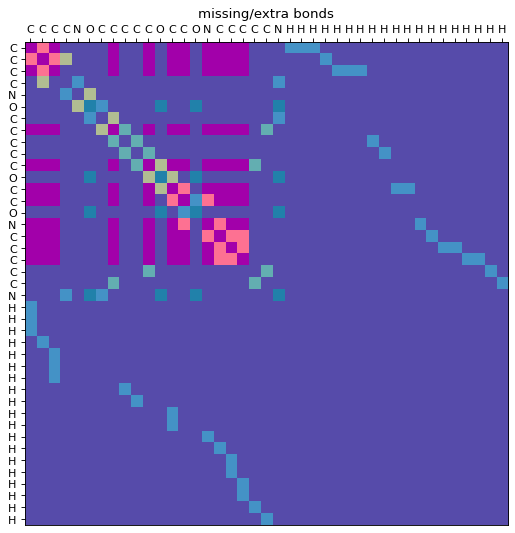

In [11]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

plt.imshow(bond_matrix)
plt.imshow(possible_less_cells, cmap='cool', alpha=.3)
plt.imshow(possible_more_cells, cmap='cool', alpha=.3)

plt.title('missing/extra bonds')

ax.xaxis.tick_top()
ax.set_xticks(list(range(row.natoms)))
ax.set_xticklabels(row.symbols)
ax.set_yticks(list(range(row.natoms)))
ax.set_yticklabels(row.symbols)

plt.show()

In [12]:
display_molecule_video(row, bond_type=True, atom_index=True)

## Data preprocessing

In [28]:
def get_dist_matrix(position_matrix):
    p1 = position_matrix.reshape(-1, 3, 1)
    p2 = position_matrix.reshape(-1, 3, 1).T
    
    return np.linalg.norm(p1 - p2, axis=1)

get_dist_matrix(np.array([[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3]]))

array([[0.        , 1.73205081, 3.46410162, 5.19615242],
       [1.73205081, 0.        , 1.73205081, 3.46410162],
       [3.46410162, 1.73205081, 0.        , 1.73205081],
       [5.19615242, 3.46410162, 1.73205081, 0.        ]])

In [52]:
i = 0
df = pd.DataFrame()

try:
    while i < 140000:
        i += 1
        row = train_db.get(i)

        dist_mat = get_dist_matrix(row.positions)
        bond_counts = get_bond_counts(dist_mat, row.symbols)

        for bond in bond_counts:
            if bond not in df.columns:
                df[bond] = 0
            df.loc[i, bond] = bond_counts[bond]


        if i % 1000 == 0:
            print('processed', i, 'molecules')
except:
    print('finished on', i)
            
df.head()

processed 1000 molecules
processed 2000 molecules
processed 3000 molecules
processed 4000 molecules
processed 5000 molecules
processed 6000 molecules
processed 7000 molecules
processed 8000 molecules
processed 9000 molecules
processed 10000 molecules
processed 11000 molecules
processed 12000 molecules
processed 13000 molecules
processed 14000 molecules
processed 15000 molecules
processed 16000 molecules
processed 17000 molecules
processed 18000 molecules
processed 19000 molecules
processed 20000 molecules
processed 21000 molecules
processed 22000 molecules
processed 23000 molecules
processed 24000 molecules
processed 25000 molecules
processed 26000 molecules
processed 27000 molecules
processed 28000 molecules
processed 29000 molecules
processed 30000 molecules
processed 31000 molecules
processed 32000 molecules
processed 33000 molecules
processed 34000 molecules
processed 35000 molecules
processed 36000 molecules
processed 37000 molecules
processed 38000 molecules
processed 39000 molec

KeyError: 'no match'

In [58]:
df.fillna(0, inplace=True)

df = df.astype('Int64')

In [64]:
df.sort_index(axis=1, inplace=True)

In [69]:
df.to_csv('data/processed/bond_types.csv', index=False)

In [1]:
i = 0
df2 = pd.DataFrame(columns=['energy'])

try:
    while i < 140000:
        i += 1
        row = train_db.get(i)

        df2.loc[i, 'energy'] = row.data.get('energy')[0]

        if i % 1000 == 0:
            print('processed', i, 'molecules')
except:
    print("finished on", i)
        
df2.to_csv('data/processed/energy.csv', index=False)
df2.head()

NameError: name 'pd' is not defined

In [17]:
i = 0
df = pd.DataFrame()

try:
    while i < 140000:
        i+=1
        row = train_db.get(i)
        atoms = row.symbols

        atomCounts = {}
        for atom in atoms:
            if atom not in atomCounts:
                atomCounts[atom] = 1
            else:
                atomCounts[atom] += 1
        atomCounts = pd.DataFrame(atomCounts, index = [0])

        df = pd.concat([df, atomCounts], ignore_index=True)

        if i % 10000 == 0:
            print('processed', i, 'molecules')
except:
    print('finished on', i)
    
df = df.fillna(0)
df = df.astype('Int64')
df.sort_index(axis=1, inplace=True)

df.to_csv('data/processed/atom_counts.csv', index=False)
df.head()

processed 10000 molecules
processed 20000 molecules
processed 30000 molecules
processed 40000 molecules
processed 50000 molecules
processed 60000 molecules
processed 70000 molecules
processed 80000 molecules
processed 90000 molecules
processed 100000 molecules
processed 110000 molecules
processed 120000 molecules
processed 130000 molecules
finished on 138366


C    S    N    O   H  Br   F  Cl
0  17  1.0  4.0  2.0  20 NaN NaN NaN
1  17  1.0  4.0  2.0  20 NaN NaN NaN
2  17  1.0  4.0  2.0  20 NaN NaN NaN
3  17  1.0  4.0  2.0  20 NaN NaN NaN
4  14  1.0  4.0  3.0  22 NaN NaN NaN

In [18]:
df = df.fillna(0)
df = df.astype('Int64')
df = df.sort_index(axis=1)

df.to_csv('data/processed/atom_counts.csv', index=False)

In [21]:
pd.concat([
    pd.read_csv('data/processed/atom_counts.csv'),
    pd.read_csv('data/processed/bond_types.csv'),
    pd.read_csv('data/processed/energy.csv'),
], axis=1).to_csv('data/processed/dataset.csv', index=False)

# Best possible result from this dataset

In [79]:
def bond_string(row): # df row
    return str(row["CC1"]) + " " + str(row["CC1.5"]) + " " + str(row["CC2"]) + " " + str(row["CCl1"]) + " " + str(row["CF1"]) + " " + str(row["CH1"]) + " " + str(row["CN1"]) + " " + str(row["CN2"]) + " " + str(row["CO1"]) + " " + str(row["CO2"]) + " " + str(row["CS1"]) + " " + str(row["CS2"]) + " " + str(row["HN1"]) + " " + str(row["HO1"]) + " " + str(row["NN1"]) + " " + str(row["NN2"]) + " " + str(row["NO1"]) + " " + str(row["NO2"]) + " " + str(row["NS1"]) + " " + str(row["NS2"]) + " " + str(row["OS1"])

df['bond_string'] = df.apply(bond_string, axis=1)

In [91]:
bse = df.pivot_table(
    index='bond_string',
    values='energy',
    aggfunc='mean'
).reset_index()

bse.columns = ['bond_string', 'mean_energy']

In [92]:
df = df.merge(bse, on='bond_string')

In [96]:
df['abs_diff'] = abs(df['energy'] - df['mean_energy'])

In [97]:
df['abs_diff'].describe()

count    138365.000000
mean          0.008870
std           0.300080
min           0.000000
25%           0.000575
50%           0.004042
75%           0.009000
max          53.730657
Name: abs_diff, dtype: float64

In [99]:
df[df['abs_diff'] > 1]

count    138352.000000
mean          0.006205
std           0.007751
min           0.000000
25%           0.000575
50%           0.004040
75%           0.009000
max           0.342850
Name: abs_diff, dtype: float64

In [ ]:
1400